## **ARIEL Engine**
This program uses [linear regression](http://www.incertitudes.fr/book.pdf) in Python to forecast predictions based on public datasets. It will display accuracy (a number out of 100) and displays a graph using Matplotlib.


In [1]:
import numpy as np
import pickle as pkl
import quandl, math, datetime
from sklearn import preprocessing
from sklearn import model_selection
# from sklearn.svm.libsvm import cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as data_plot
from matplotlib import style


In [2]:
# using style
style.use('ggplot')

quandl.api_config.ApiConfig.api_key = 'h-FrEDCiZnh5cKM3Cuva'
# getting random data from the api

stockCode = input("Please enter the Stock Code for predictions: ")
data = quandl.get('WIKI/' + stockCode)
# writing
writeFile = open("ARIELDataWrite.txt", "w")
writeFile.write(str(data))
writeFile.close()
print(data)

Please enter the Stock Code for predictions: AAPL
               Open     High       Low    Close      Volume  Ex-Dividend  \
Date                                                                       
1980-12-12   28.750   28.870   28.7500   28.750   2093900.0          0.0   
1980-12-15   27.380   27.380   27.2500   27.250    785200.0          0.0   
1980-12-16   25.370   25.370   25.2500   25.250    472000.0          0.0   
1980-12-17   25.870   26.000   25.8700   25.870    385900.0          0.0   
1980-12-18   26.630   26.750   26.6300   26.630    327900.0          0.0   
1980-12-19   28.250   28.380   28.2500   28.250    217100.0          0.0   
1980-12-22   29.630   29.750   29.6300   29.630    166800.0          0.0   
1980-12-23   30.880   31.000   30.8800   30.880    209600.0          0.0   
1980-12-24   32.500   32.630   32.5000   32.500    214300.0          0.0   
1980-12-26   35.500   35.620   35.5000   35.500    248100.0          0.0   
1980-12-29   36.000   36.130   36.0000

In [3]:
# print(data.head())
# print(data.keys())
# condenses the information
# assert "Forecasting" in data
data = data[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
# creating new variable which is the high low percent
data['HL_PCT'] = (data['Adj. High'] - data['Adj. Close']) / data['Adj. Close'] * 100.0
# creating new variable which is the Percentage Change
data['PCT_Change'] = (data['Adj. Close'] - data['Adj. Open']) / data['Adj. Open'] * 100.0

data = data[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]


In [4]:
# forecasting out dataset
forecastData = 'Adj. Close'
data.fillna(-99999, inplace=True)
print(data)
# comment if necessary
print(len(data))

forecastOut = int(math.ceil(0.02*len(data)))

data['Label'] = data[forecastData].shift(-forecastOut)
# print(data)

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
1980-12-12    0.422706  0.417391    0.000000  117258400.0
1980-12-15    0.400652  0.477064   -0.474799   43971200.0
1980-12-16    0.371246  0.475248   -0.473000   26432000.0
1980-12-17    0.380362  0.502513    0.000000   21610400.0
1980-12-18    0.391536  0.450620    0.000000   18362400.0
1980-12-19    0.415355  0.460177    0.000000   12157600.0
1980-12-22    0.435644  0.404995    0.000000    9340800.0
1980-12-23    0.454023  0.388601    0.000000   11737600.0
1980-12-24    0.477841  0.400000    0.000000   12000800.0
1980-12-26    0.521950  0.338028    0.000000   13893600.0
1980-12-29    0.529301  0.361111    0.000000   23290400.0
1980-12-30    0.516363  0.370159   -0.368794   17220000.0
1980-12-31    0.501807  0.351597   -0.350365    8937600.0
1981-01-02    0.507247  0.724638    0.000000    5415200.0
1981-01-05    0.496220  0.355556   -0.354296    8932000.0
1981-01-06    

In [5]:
x = np.array(data.drop(['Label'], 1))
x = preprocessing.scale(x)
xLately = x[-forecastOut: ]
x = x[:-forecastOut]
data.dropna(inplace = True)
y = np.array(data['Label'])


/home/brianlechthaler/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [6]:
trainX, testX, trainY, testY = model_selection.train_test_split(x, y, test_size=0.2)

frameControl = LinearRegression(n_jobs=-1)

frameControl.fit(trainX, trainY)
with open('linearregression.pickle', 'wb') as a:
    pkl.dump(frameControl, a)

inPickle = open('linearregression.pickle', 'rb')
frameControl = pkl.load(inPickle)

accuracy = frameControl.score(testX, testY) * 100.0

setForecast = frameControl.predict(xLately)

data['Forecasting the Data'] = np.nan
last_date = data.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


In [7]:
for i in setForecast:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    data.loc[next_date] = [np.nan for _ in range(len(data.columns) - 1)] + [i]

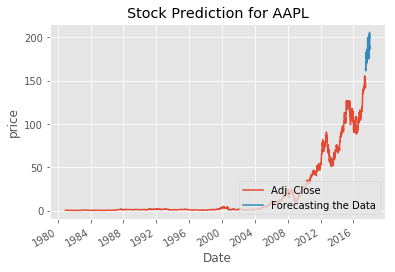

93.83931157723417


In [8]:
# plot the data for visualization
data['Adj. Close'].plot()
data['Forecasting the Data'].plot()
data_plot.legend(loc=4)
data_plot.title('Stock Prediction for ' + stockCode)
data_plot.xlabel('Date')
data_plot.ylabel('price')
data_plot.show()
print(accuracy)